
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Machine Learning & Classification <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [ ]:

Name = 'mobina'
Last_Name = 'kochaknia'

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        """
        Initialize the parameters for the Logistic Regression model.
        """
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []
        self.validation_accuracy = []

    def sigmoid(self, z):
        """
        Apply the sigmoid function to scalar, vector, or matrix.
        """
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute the binary cross-entropy loss for the current weights.
        """
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        loss = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss function with respect to the weights.
        """
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        return gradient

    def test_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of the model on test data.
        """
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the Logistic Regression model using gradient descent.
        """
        # Initialize weights
        n_features = X_train.shape[1]
        self.weights = np.zeros(n_features)

        for step in range(self.n_steps):
            # Compute gradient and update weights
            gradient = self.compute_gradient(X_train, y_train)
            self.weights -= self.learning_rate * gradient

            # Compute loss and validation accuracy
            train_loss = self.compute_loss(X_train, y_train)
            self.loss_history.append(train_loss)

            val_accuracy = self.test_accuracy(X_val, y_val)
            self.validation_accuracy.append(val_accuracy)

            # Check for convergence
            if np.linalg.norm(gradient) < self.tolerance:
                print(f"Convergence reached at step {step}")
                break

            if step % 100 == 0:
                print(f"Step {step}, Training Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    def predict(self, X):
        """
        Predict binary labels for given data.
        """
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels):
        """
        Plot the confusion matrix for the validation data.
        """
        y_pred = self.predict(X_val)
        cm = confusion_matrix(y_val, y_pred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot()
        plt.title("Confusion Matrix")
        plt.show()


Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Step 0, Training Loss: 0.6714, Validation Accuracy: 0.8000
Step 100, Training Loss: 0.3500, Validation Accuracy: 0.8333
Step 200, Training Loss: 0.3358, Validation Accuracy: 0.8333
Step 300, Training Loss: 0.3329, Validation Accuracy: 0.8333
Step 400, Training Loss: 0.3321, Validation Accuracy: 0.8333
Step 500, Training Loss: 0.3319, Validation Accuracy: 0.8333
Step 600, Training Loss: 0.3318, Validation Accuracy: 0.8333
Step 700, Training Loss: 0.3318, Validation Accuracy: 0.8333
Step 800, Training Loss: 0.3318, Validation Accuracy: 0.8167
Step 900, Training Loss: 0.3318, Validation Accuracy: 0.8167


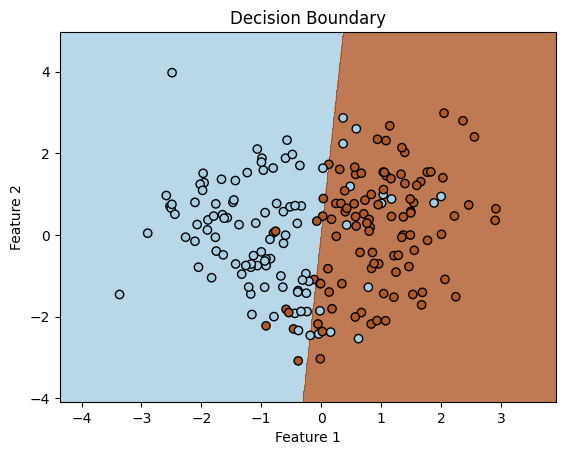

In [4]:
#TODO: create a sample linearly separable binary dataset and visualize the decision boundary
# Generate a linearly separable binary classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_test, y_test)

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict for each point in the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, model)

### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame for better inspection
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic information about the dataset
print("Features:")
print(data.feature_names)
print("\nTarget Names:")
print(data.target_names)
print("\nDataset Shape:")
print(df.shape)
print("\nFirst 5 Rows:")
print(df.head())


Features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names:
['malignant' 'benign']

Dataset Shape:
(569, 31)

First 5 Rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      38

As you are familiar with, adding bias term 1 is necessary as well:

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


X = data.data  # Features
y = data.target  # Labels

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (column of ones)
X_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")


Training Features Shape: (455, 31)
Test Features Shape: (114, 31)
Training Labels Shape: (455,)
Test Labels Shape: (114,)


Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

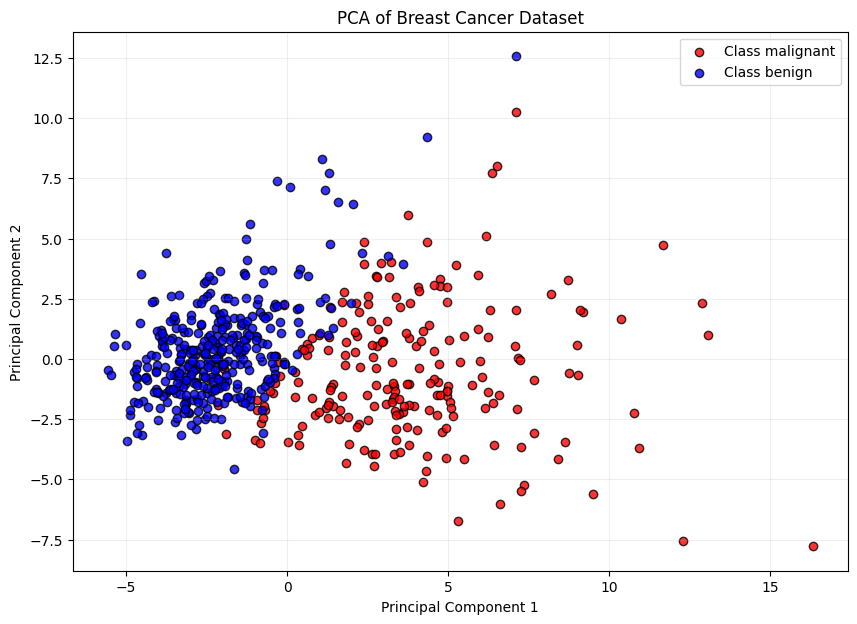

In [7]:
# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the data in the first two principal components
plt.figure(figsize=(10, 7))
for target, color, label in zip([0, 1], ['red', 'blue'], ['Class malignant', 'Class benign']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=color, label=label, edgecolor='k', alpha=0.8)

plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right")
plt.grid(alpha=0.2)
plt.show()


Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

In [8]:
#TODO: Train model and print out validation accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the Logistic Regression model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_test, y_test)

# Evaluate model performance
validation_accuracy = model.test_accuracy(X_test, y_test)
print(f"Validation Accuracy: {validation_accuracy:.4f}")




Step 0, Training Loss: 0.5265, Validation Accuracy: 0.9649
Step 100, Training Loss: 0.1054, Validation Accuracy: 0.9912
Step 200, Training Loss: 0.0868, Validation Accuracy: 0.9912
Step 300, Training Loss: 0.0786, Validation Accuracy: 0.9825
Step 400, Training Loss: 0.0736, Validation Accuracy: 0.9825
Step 500, Training Loss: 0.0701, Validation Accuracy: 0.9825
Step 600, Training Loss: 0.0675, Validation Accuracy: 0.9825
Step 700, Training Loss: 0.0654, Validation Accuracy: 0.9825
Step 800, Training Loss: 0.0638, Validation Accuracy: 0.9825
Step 900, Training Loss: 0.0623, Validation Accuracy: 0.9825
Validation Accuracy: 0.9825


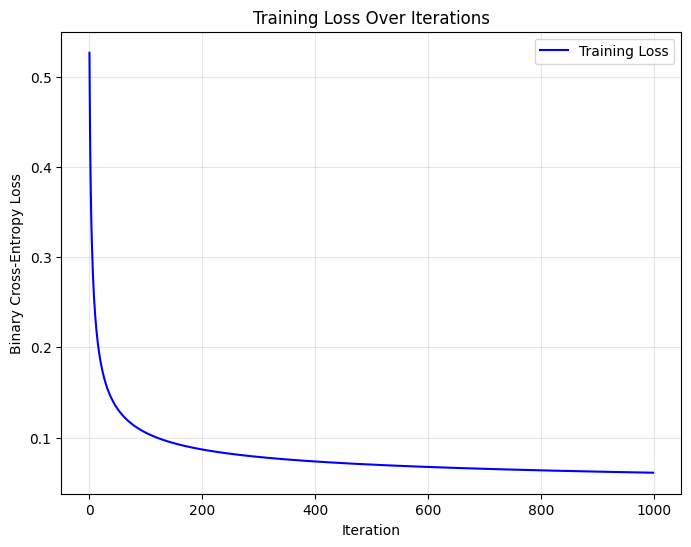

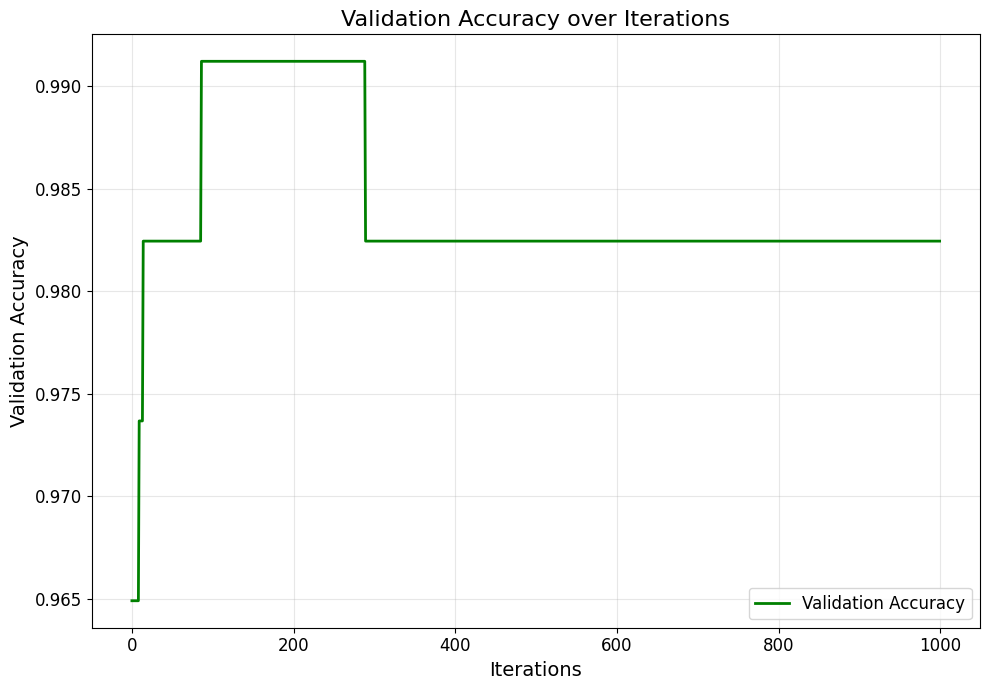

In [9]:
# Plot training loss over iterations
plt.figure(figsize=(8, 6))
plt.plot(model.loss_history, label="Training Loss", color='blue')
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot validation accuracy over iterations
plt.figure(figsize=(10, 7))
plt.plot(model.validation_accuracy, label="Validation Accuracy", color='green', linewidth=2)
plt.title("Validation Accuracy over Iterations", fontsize=16)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Validation Accuracy", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



# please notice that : The chart above is simply a scaled version of the output chart, and the numbers and trends are completely consistent.

:**Why does the validation accuracy show a slight decrease?**


1) Validation accuracy can slightly decrease due to the inherent randomness in the data or model updates.

2)Validation data might contain noise or samples that are particularly hard for the model to classify. A small drop could result from these outliers.

3) A slight decrease in validation accuracy might indicate the model is starting to memorize the training data rather than generalizing.(it's becouas overfiting)

4)Changes in weight initialization, dropout rates, or regularization might lead to minor accuracy variations

5)Smaller batch sizes can lead to noisier gradient updates, causing slight fluctuations in accuracy.


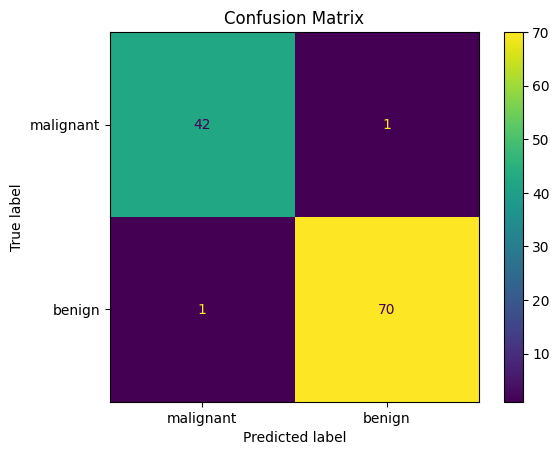

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(conf_matrix, display_labels=data.target_names).plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [11]:
import os

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
!unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
License(s): CC0-1.0
rotten-tomatoes-movies-and-critic-reviews-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  rotten-tomatoes-movies-and-critic-reviews-dataset.zip
replace rotten_tomatoes_critic_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no 
replace rotten_tomatoes_movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no 


#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [ ]:
!pip install nltk

#### Libraries

In [12]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

In [13]:
# Load the dataset
data_path = "rotten_tomatoes_critic_reviews.csv"
df = pd.read_csv(data_path)

# Filter the dataset
filtered_df = df[
    (df['review_score'].notnull()) & (df['top_critic'] == True)
]

# Customize the display for better readability
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.max_colwidth", 50)
print(f"Original Dataset Shape: {df.shape}")
print(f"Filtered Dataset Shape: {filtered_df.shape}")
# Display the filtered dataset
print(filtered_df[['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
                   'review_type', 'review_score', 'review_date', 'review_content']].head())



Original Dataset Shape: (1130017, 8)
Filtered Dataset Shape: (186017, 8)
   rotten_tomatoes_link       critic_name  top_critic       publisher_name review_type review_score review_date                                     review_content
7             m/0814255  Bill Goodykoontz        True     Arizona Republic       Fresh        3.5/5  2010-02-10  Percy Jackson isn't a great movie, but it's a ...
9             m/0814255      Jim Schembri        True  The Age (Australia)       Fresh          3/5  2010-02-10  Crammed with dragons, set-destroying fights an...
11            m/0814255       Roger Moore        True     Orlando Sentinel      Rotten          2/4  2010-02-10  For what it is and for whom it is intended, it...
12            m/0814255     David Jenkins        True             Time Out      Rotten          2/5  2010-02-10  Chris Columbus returns to his comfort zone for...
21            m/0814255    Stephen Holden        True       New York Times      Rotten          2/5  2010-02-11 

To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [14]:
runtime_env = 'GPU' # or CPU

In [15]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

if runtime_env == 'GPU':
  import cudf
  import cupy as cp

  def preprocess_text_gpu(text_series):
      text_series = cudf.Series(text_series)
      text_series = text_series.str.lower()
      text_series = text_series.str.replace(r'[^a-z\s]', '', regex=True)
      text_series = text_series.to_pandas()

      processed_texts = []
      for text in text_series:
          tokens = word_tokenize(text)
          tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
          processed_texts.append(' '.join(tokens))
      return processed_texts

  filtered_df['processed_content'] = preprocess_text_gpu(filtered_df['review_content'].astype(str))

elif runtime_env == 'CPU':
  def preprocess_text(text):
      text = text.lower()
      text = re.sub(r'[^a-z\s]', '', text)
      tokens = word_tokenize(text)
      tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
      return ' '.join(tokens)

  filtered_df['processed_content'] = filtered_df['review_content'].astype(str).apply(preprocess_text)

print(filtered_df[['review_type', 'review_content', 'processed_content']].head())

   review_type                                     review_content                                  processed_content
7        Fresh  Percy Jackson isn't a great movie, but it's a ...  percy jackson isnt great movie good one trotti...
9        Fresh  Crammed with dragons, set-destroying fights an...  crammed dragon setdestroying fight thing explo...
11      Rotten  For what it is and for whom it is intended, it...                 intended bad movie indifferent one
12      Rotten  Chris Columbus returns to his comfort zone for...  chris columbus return comfort zone mirthless e...
21      Rotten  Although the standard allegorical bases for my...  although standard allegorical base mythicalque...


<ipython-input-15-b5bf0fc38d87>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['processed_content'] = preprocess_text_gpu(filtered_df['review_content'].astype(str))


Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

Class Distribution:
review_type
Fresh     109447
Rotten     76570
Name: count, dtype: int64


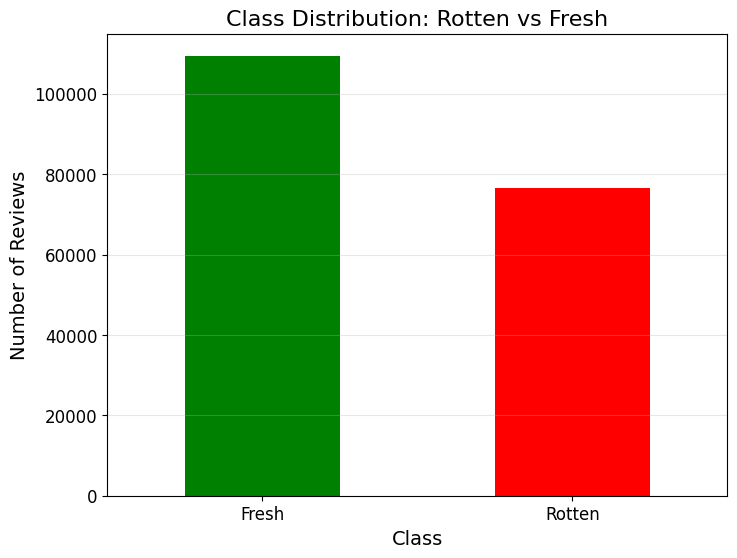

In [16]:
#TODO: inspect classes 'Rotten' and 'Fresh'
import matplotlib.pyplot as plt

# Inspect the distribution of classes in the 'review_type' column
class_counts = filtered_df['review_type'].value_counts()

# Print the counts for each class
print("Class Distribution:")
print(class_counts)

# Visualize the distribution using a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Class Distribution: Rotten vs Fresh", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

fresh_reviews = filtered_df[filtered_df['review_type'] == 'Fresh']['processed_content'].iloc[:60000]
rotten_reviews = filtered_df[filtered_df['review_type'] == 'Rotten']['processed_content'].iloc[:60000]


limited_reviews = pd.concat([fresh_reviews, rotten_reviews])


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(limited_reviews)


vocab = tfidf_vectorizer.get_feature_names_out()
vocab_index = {word: idx for idx, word in enumerate(vocab)}
tfidf_values = tfidf_matrix.toarray()


fresh_tfidf = tfidf_values[:len(fresh_reviews)]
rotten_tfidf = tfidf_values[len(fresh_reviews):]


mean_fresh_tfidf = np.mean(fresh_tfidf, axis=0)
mean_rotten_tfidf = np.mean(rotten_tfidf, axis=0)


def generate_tfidf_embedding(review):
    words = review.split()
    indices = [vocab_index[word] for word in words if word in vocab_index]
    fresh_score = mean_fresh_tfidf[indices].sum() if indices else 0
    rotten_score = mean_rotten_tfidf[indices].sum() if indices else 0
    return np.array([rotten_score, fresh_score])


filtered_df['tfidf_embedding'] = filtered_df['processed_content'].apply(generate_tfidf_embedding)


embeddings = np.stack(filtered_df['tfidf_embedding'].values)
norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
norms[norms == 0] = 1
filtered_df['tfidf_embedding'] = (embeddings / norms).tolist()


print(filtered_df[['review_type', 'processed_content', 'tfidf_embedding']].head())


<ipython-input-17-1228c07d6543>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tfidf_embedding'] = filtered_df['processed_content'].apply(generate_tfidf_embedding)


   review_type                                  processed_content                           tfidf_embedding
7        Fresh  percy jackson isnt great movie good one trotti...    [0.74335735782008, 0.6688944898672359]
9        Fresh  crammed dragon setdestroying fight thing explo...  [0.6535700143473663, 0.7568660623558064]
11      Rotten                 intended bad movie indifferent one  [0.7753411661928895, 0.6315426161445086]
12      Rotten  chris columbus return comfort zone mirthless e...    [0.77742392709249, 0.6289769769904863]
21      Rotten  although standard allegorical base mythicalque...   [0.7672852658242127, 0.641305949488282]


<ipython-input-17-1228c07d6543>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tfidf_embedding'] = (embeddings / norms).tolist()


Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

In [18]:
# split dataset and train you model
X = np.array(filtered_df['tfidf_embedding'].tolist())
y = (filtered_df['review_type'] == 'Fresh').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

model = LogisticRegressionGD(learning_rate= 0.1, n_steps= 1000, tolerance= 1e-6)
model.fit(X_train, y_train, X_test, y_test)

test_accuracy = model.test_accuracy(X_test, y_test)

print(f"Test Accuracy : {test_accuracy:.6f}")




Step 0, Training Loss: 0.6923, Validation Accuracy: 0.5906
Step 100, Training Loss: 0.6713, Validation Accuracy: 0.5906
Step 200, Training Loss: 0.6652, Validation Accuracy: 0.5922
Step 300, Training Loss: 0.6598, Validation Accuracy: 0.5943
Step 400, Training Loss: 0.6548, Validation Accuracy: 0.5973
Step 500, Training Loss: 0.6502, Validation Accuracy: 0.6006
Step 600, Training Loss: 0.6459, Validation Accuracy: 0.6043
Step 700, Training Loss: 0.6420, Validation Accuracy: 0.6089
Step 800, Training Loss: 0.6384, Validation Accuracy: 0.6148
Step 900, Training Loss: 0.6350, Validation Accuracy: 0.6210
Test Accuracy : 0.629395


Model Performance:
Accuracy: 0.6294
Precision: 0.6213
Recall: 0.9539
F1-Score: 0.7525


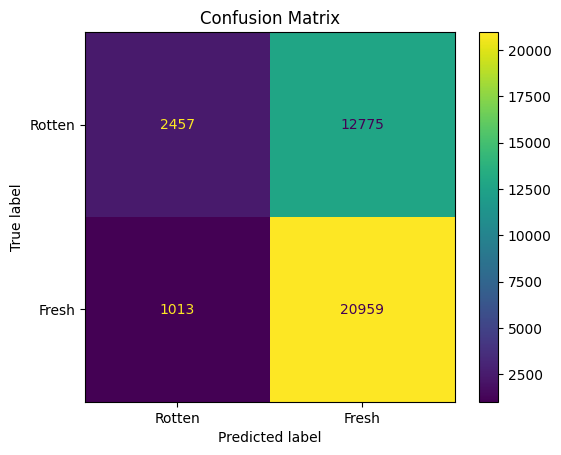

In [19]:
# inspect the performance of model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rotten', 'Fresh'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()



## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


First, let's load the dataset and inspect it:

In [4]:
import pandas as pd

# Reload the CSV file with the correct delimiter
data_path = "bank.csv"  # Adjust the file path if needed
df = pd.read_csv(data_path, delimiter=';')
print(df.columns)
# Display the first few rows
print(df.head())

# Get an overview of the dataset
print(df.info())

# Get a statistical summary of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())




Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1

In [19]:

print(df['y'].value_counts())


y
no     4000
yes     521
Name: count, dtype: int64


### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def information_gain(self, X, y, feature_index):
        """Calculate the information gain for a feature."""
        parent_entropy = self.entropy(y)
        unique_values = np.unique(X[:, feature_index])
        weighted_entropy = 0

        for value in unique_values:
            subset_indices = X[:, feature_index] == value
            subset_y = y[subset_indices]
            weighted_entropy += (len(subset_y) / len(y)) * self.entropy(subset_y)

        return parent_entropy - weighted_entropy

    def best_feature_to_split(self, X, y):
        """Find the best feature to split the dataset."""
        best_gain = -1
        best_feature = None

        for feature_index in range(X.shape[1]):
            gain = self.information_gain(X, y, feature_index)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index

        return best_feature

    def fit(self, X, y, depth=0):
        """Fit the decision tree to the training data."""
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Counter(y).most_common(1)[0][0]

        feature_index = self.best_feature_to_split(X, y)
        if feature_index is None:
            return Counter(y).most_common(1)[0][0]

        tree = {feature_index: {}}
        unique_values = np.unique(X[:, feature_index])

        for value in unique_values:
            subset_indices = X[:, feature_index] == value
            subset_X = X[subset_indices]
            subset_y = y[subset_indices]
            tree[feature_index][value] = self.fit(subset_X, subset_y, depth + 1)

        self.tree = tree
        return tree

    def predict_sample(self, sample, tree):
        """Predict the label for a single sample by traversing the tree."""
        if not isinstance(tree, dict):
            return tree

        feature_index = list(tree.keys())[0]
        feature_value = sample[feature_index]
        if feature_value in tree[feature_index]:
            return self.predict_sample(sample, tree[feature_index][feature_value])
        else:
            return Counter(y).most_common(1)[0][0]  # Default to majority class

    def predict(self, X):
        """Predict the labels for a dataset."""
        return [self.predict_sample(sample, self.tree) for sample in X]


### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.94      0.69       111
           1       0.63      0.12      0.21        98

    accuracy                           0.56       209
   macro avg       0.59      0.53      0.45       209
weighted avg       0.59      0.56      0.46       209



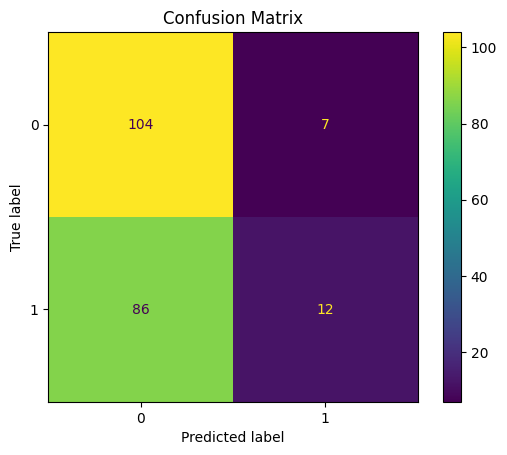

Predicted Class Distribution: Counter({0: 190, 1: 19})


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter

# Encode categorical features and target column
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split dataset into features (X) and labels (y)
X = df.drop(columns=['y'])  # Replace 'y' with your target column name if different
y = df['y']


undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split Resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the DecisionTree model
model = DecisionTree(max_depth=8)
model.fit(X_train.to_numpy(), y_train.to_numpy())

# Make predictions on the test set
y_pred = model.predict(X_test.to_numpy())

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# Class distribution in predictions
pred_class_distribution = Counter(y_pred)
print("Predicted Class Distribution:", pred_class_distribution)


**Could you explain why is the Accuracy Poor?**
Accuracy is poor in the previous method because numerical features like age and balance were treated as categorical variables, splitting data at each unique value instead of meaningful thresholds. This led to fragmented, less informative splits, increased entropy, and overfitting, preventing the model from capturing the true relationships in the data.

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [1]:
import numpy as np
from collections import Counter

class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        """
        Initialize the DecisionTree class.
        Args:
            max_depth (int, optional): Maximum depth of the tree. If None, the tree grows fully.
        """
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        counts = Counter(y)
        probabilities = np.array(list(counts.values())) / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Add epsilon to avoid log(0)

    def information_gain(self, X, y, feature_index, threshold=None):
        """Calculate the information gain for a categorical or numerical feature."""
        parent_entropy = self.entropy(y)

        if threshold is not None:  # Numerical feature
            left_indices = np.where(X[:, feature_index] <= threshold)[0]
            right_indices = np.where(X[:, feature_index] > threshold)[0]
        else:  # Categorical feature
            unique_values = np.unique(X[:, feature_index])
            left_indices = np.where(X[:, feature_index] == unique_values[0])[0]
            right_indices = np.where(X[:, feature_index] != unique_values[0])[0]

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0  # Avoid invalid splits

        # Calculate entropy for the subsets
        left_entropy = self.entropy(y[left_indices])
        right_entropy = self.entropy(y[right_indices])

        # Weighted entropy of children
        n = len(y)
        weighted_entropy = (len(left_indices) / n) * left_entropy + (len(right_indices) / n) * right_entropy

        # Information gain
        return parent_entropy - weighted_entropy

    def find_best_threshold(self, feature_column, y):
        """
        Find the best threshold to split a numerical feature.
        Returns the best threshold and the corresponding information gain.
        """
        unique_values = np.unique(feature_column)
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2  # Midpoints as potential thresholds

        best_gain = 0
        best_threshold = None

        for threshold in thresholds:
            gain = self.information_gain(feature_column[:, None], y, 0, threshold)
            if gain > best_gain:
                best_gain = gain
                best_threshold = threshold

        return best_threshold, best_gain

    def best_feature_to_split(self, X, y):
        """
        Determine the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """
        best_feature = None
        best_threshold = None
        best_gain = 0

        n_features = X.shape[1]
        for feature_index in range(n_features):
            if np.issubdtype(X[:, feature_index].dtype, np.number):  # Numerical feature
                threshold, gain = self.find_best_threshold(X[:, feature_index], y)
            else:  # Categorical feature
                gain = self.information_gain(X, y, feature_index)
                threshold = None

            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        Returns:
            A dictionary representing the decision tree.
        """
        if len(np.unique(y)) == 1:
            return y[0]  # Pure node
        if self.max_depth is not None and depth >= self.max_depth:
            return Counter(y).most_common(1)[0][0]  # Majority class

        best_feature, best_threshold, best_gain = self.best_feature_to_split(X, y)
        if best_gain == 0:
            return Counter(y).most_common(1)[0][0]  # No gain, return majority class

        tree = {"feature": best_feature, "threshold": best_threshold, "children": {}}
        if best_threshold is not None:  # Numerical feature
            left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
            right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        else:  # Categorical feature
            unique_values = np.unique(X[:, best_feature])
            left_indices = np.where(X[:, best_feature] == unique_values[0])[0]
            right_indices = np.where(X[:, best_feature] != unique_values[0])[0]

        tree["children"]["left"] = self.fit(X[left_indices], y[left_indices], depth + 1)
        tree["children"]["right"] = self.fit(X[right_indices], y[right_indices], depth + 1)

        return tree

    def predict_sample(self, sample, tree):
        """Predict the label for a single sample."""
        if isinstance(tree, dict):
            feature = tree["feature"]
            threshold = tree["threshold"]

            if threshold is not None:  # Numerical feature
                if sample[feature] <= threshold:
                    child = tree["children"]["left"]
                else:
                    child = tree["children"]["right"]
            else:  # Categorical feature
                child = tree["children"].get(sample[feature], None)

            return self.predict_sample(sample, child)
        return tree

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        """
        return np.array([self.predict_sample(sample, self.tree) for sample in X])


### Testing (5 points)

Accuracy: 0.9006

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       807
           1       0.56      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.74      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905



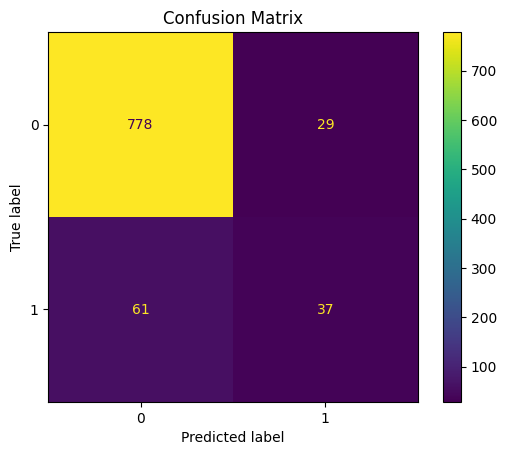

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

#  Split dataset into features (X) and labels (y)
X = df.drop('y', axis=1)  # Replace 'y' with your target column's name
y = df['y']  # Replace 'y' with your target column's name

#  Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for compatibility with the decision tree
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Train your model
tree = ImprovedDecisionTree(max_depth=5)
tree.tree = tree.fit(X_train_np, y_train_np)

# Make predictions on the test set
y_pred = tree.predict(X_test_np)

# Evaluate the predictions
accuracy = accuracy_score(y_test_np, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test_np))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?**
The accuracy improved because numerical features like balance and age contain valuable predictive information that can only be effectively utilized when treated properly with threshold-based splits. These splits allow the model to identify meaningful intervals (e.g., age > 30) rather than treating each value as a separate category. This approach captures patterns and relationships in continuous data, leading to more informed splits, reduced entropy, and better generalization, significantly boosting the model's performance